In [1]:
pip install deap

     |████████████████████████████████| 163kB 4.5MB/s 


In [2]:
import random
import time

from deap import base
from deap import creator
from deap import tools
from deap.benchmarks import griewank

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal
from IPython import display
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
X = []
Y = []
Z = []

def l_show(x, y):
  return griewank([x,y])[0]

def startPlot():
  global X, Y, Z
  rastrigin_vectorized = np.vectorize(l_show)

  x = np.linspace(-10, 10, 60)
  y = np.linspace(-10, 10, 60)

  X, Y = np.meshgrid(x, y)
  Z = rastrigin_vectorized(X, Y)
  plt.figure()

def updatePlot(population):
  global X, Y, Z
  plt.clf()
  x1 = [ind[random.randint(0, len(ind)-1)] for ind in population]
  x1 = [a if a > -10 and a < 10 else max(-10, min(a, 10)) for a in x1]
  x2 = [ind[random.randint(0, len(ind)-1)] for ind in population]
  x2 = [a if a > -10 and a < 10 else max(-10, min(a, 10)) for a in x2]
  plt.contour(X, Y, Z)
  plt.scatter(x1, x2, color='red')
  display.display(plt.gcf())
  display.clear_output(wait=True)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


-- Generation 100 --
  Min 0.03440115455845916
-- Generation 200 --
  Min 0.03440115436783975
-- Generation 300 --
  Min 0.03440115436783975

-- Generation 300 --
-- Min 0.03440115436783975
-- b_Ind [-6.0907350954534014e-09, -6.619379132431513e-09, -6.718443527680201e-09, -6.270642403346856, 1.531374101631447e-08, -2.4589567631385908e-08, -2.4701488114926794e-08, 1.5192719007164015e-08, -1.607027686793664e-08, 9.885159503400125]
-- Generation 100 --
  Min 0.09100728332095942
-- Generation 200 --
  Min 0.0910072832869887
-- Generation 300 --
  Min 0.0910072832869887

-- Generation 300 --
-- Min 0.0910072832869887
-- b_Ind [3.5056574107263794e-10, -5.132476206616115e-10, 1.0358367568106152e-09, 3.598279001420291e-09, -7.007291839104606, -15.344556563194708, 7.380709660036987e-10, 8.85035618665922, -2.8027429280855536e-08, -2.3464162933673345e-09]
-- Generation 100 --
  Min 0.029552183741408222
-- Generation 200 --
  Min 0.029552183692774125
-- Generation 300 --
  Min 0.029552183692774125

No handles with labels found to put in legend.


-- Generation 300 --
  Min 0.051732915670791635

-- Generation 300 --
-- Min 0.051732915670791635
-- b_Ind [-3.1400225036915907, 8.876888379910142, -5.4332476272704335, -6.270643162492446, 7.0072953924871015, -2.0118891384890628e-08, 1.789388844851945e-08, 2.159349601788583e-09, -2.6839998458234634e-08, -3.009832933407788e-08]
Melhor fitness 0.01478
Desvio padrão do fitness 0.07670
Média do fitness 0.09133
Máximo do fitness 0.38144
Geração:  66
[0.07670, 0.09133, 0.38144, 0.01478]


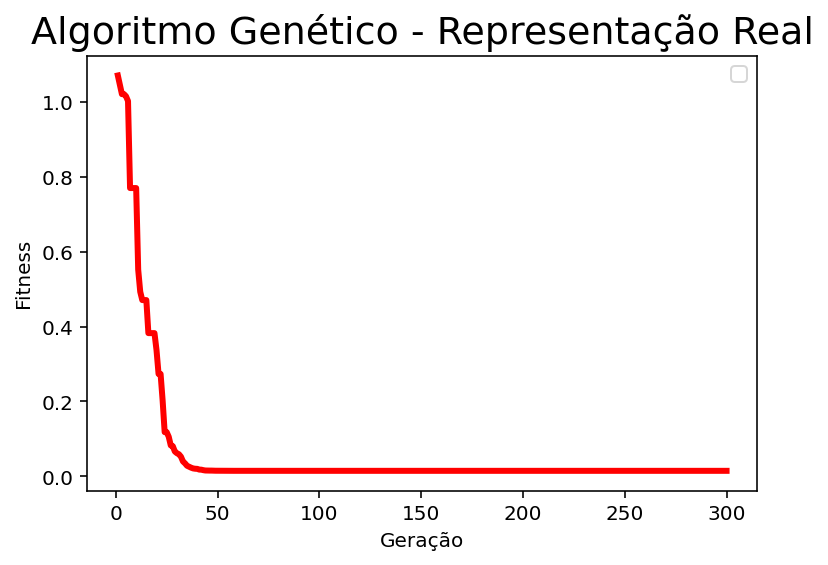

In [9]:
# quantidade de variaveis
N = 10
# valor máximo e mínimo possível
MIN_LIMIT = -20
MAX_LIMIT = 20
# valor de precisão
PRECISION = 0.0000000001

# funcao de avaliação com a função griewank
def evalProblem(individual):
  return griewank(individual)

def normDistrMutation (individual, low, up, indpb):
  new_ind = []
  for ind in individual:
    if random.random() < indpb:
      desv = ind*0.2
      value = random.uniform(ind-desv,ind+desv)
      value = max(MIN_LIMIT, min(MAX_LIMIT, value))
      new_ind.append(value)
    else:
      new_ind.append(ind)
  return new_ind

def execution():
  # startPlot()
  pop_min_value = list()

  creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
  creator.create("Individual", list, fitness=creator.FitnessMax)

  toolbox = base.Toolbox()
  # Attribute generator 
  toolbox.register("attr_float", random.uniform, MIN_LIMIT, MAX_LIMIT)
  # Structure initializers
  toolbox.register("individual", tools.initRepeat, creator.Individual, 
      toolbox.attr_float, N)
  toolbox.register("population", tools.initRepeat, list, toolbox.individual)

  toolbox.register("evaluate", evalProblem)
  toolbox.register("mate", tools.cxBlend, alpha=0.5)
  toolbox.register("mutate", tools.mutPolynomialBounded, low=MIN_LIMIT, up=MAX_LIMIT, eta=20, indpb=0.01)
  # toolbox.register("mutate", normDistrMutation, low=MIN_LIMIT, up=MAX_LIMIT, indpb=0.2)
  # toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
  toolbox.register("select", tools.selTournament, tournsize=3)


  pop = toolbox.population(n=300)
  # Evaluate the entire population
  fitnesses = list(map(toolbox.evaluate, pop))
  for ind, fit in zip(pop, fitnesses):
      ind.fitness.values = fit
  # CXPB  is the probability with which two individuals
  #       are crossed
  #
  # MUTPB is the probability for mutating an individual
  CXPB, MUTPB = 0.5, 0.2
  # Extracting all the fitnesses of 
  fits = [ind.fitness.values[0] for ind in pop]
  # Variable keeping track of the number of generations
  g = 0

  # Begin the evolution
  while g < 300:
      # A new generation
      g = g + 1
      # Select the next generation individuals
      offspring = toolbox.select(pop, len(pop))
      # Clone the selected individuals
      offspring = list(map(toolbox.clone, offspring))
      # Apply crossover and mutation on the offspring
      for child1, child2 in zip(offspring[::2], offspring[1::2]):
          if random.random() < CXPB:
              # child1, child2 = tools.cxBlend(child1, child2, 0.5)
              toolbox.mate(child1, child2)
              del child1.fitness.values
              del child2.fitness.values

      for mutant in offspring:
          if random.random() < MUTPB:
              toolbox.mutate(mutant)
              del mutant.fitness.values
      # Evaluate the individuals with an invalid fitness
      invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      fitnesses = map(toolbox.evaluate, invalid_ind)
      for ind, fit in zip(invalid_ind, fitnesses):
          ind.fitness.values = fit
      pop[:] = offspring
      # Gather all the fitnesses in one list and print the stats
      fits = [ind.fitness.values[0] for ind in pop]
      
      length = len(pop)
      mean = sum(fits) / length
      sum2 = sum(x*x for x in fits)
      std = abs(sum2 / length - mean**2)**0.5
      
      if g % 100 == 0:
        print("-- Generation %i --" % g)
        print("  Min %s" % min(fits))
        # print("  Max %s" % max(fits))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        # updatePlot(pop)
        # time.sleep(1.0)
      
      pop_min_value.append(min(fits))
    
  print()
  print("-- Generation %i --" % g)
  print("-- Min %s" % min(fits))
  print("-- b_Ind %s" % pop[fits.index(min(fits))])

  return min(fits),pop_min_value


min_value = list()
population_best_fitness = list()
best_fitness = 999.

#mean_value = list()
#std_value = list()

for ex in range(1,31):
  min_fitness,pop_min_value = execution()
  min_value.append(min_fitness)

  if min_fitness < best_fitness:
    best_fitness = min_fitness 
    population_best_fitness = pop_min_value.copy()


generation = -1
epsilon = 0.0000001
for i in range (0, len(population_best_fitness) - 1):
  if(population_best_fitness[i] < population_best_fitness[i+1] and (population_best_fitness[i+1] - population_best_fitness[i]) > epsilon):
    generation = i+1

print("Melhor fitness {:.5f}".format(best_fitness))
print("Desvio padrão do fitness {:.5f}".format(np.std(min_value)))
print("Média do fitness {:.5f}".format(np.mean(min_value)))
print("Máximo do fitness {:.5f}".format(np.max(min_value)))
print ("Geração: ",generation)

#dp, media, maior, menor
print( "[{:.5f}, {:.5f}, {:.5f}, {:.5f}]".format(np.std(min_value),np.mean(min_value),np.max(min_value),best_fitness))
plt.clf()
plt.plot(range(1, len (population_best_fitness)+1), population_best_fitness, linewidth=3, color='red')
#plt.plot(n_list, std_value, linewidth=3, color='blue', label='Desvio padrão do fitness')
plt.legend(loc='upper right')
plt.title('Algoritmo Genético - Representação Real', fontsize=19)
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.show()

#plt.clf()
#plt.plot(n_list, min_value, linewidth=3, color='red')
#plt.legend(loc='upper right')
#plt.title('AG Real - Melhor fitness', fontsize=19)
#plt.xlabel('Execução')
#plt.ylabel('Fitness')
#plt.show()


